In [1]:
import re
import json
from pprint import pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
from text_preprocess import processTweet2,getStopWordList,replaceTwoOrMore
from textblob import TextBlob
import sys

In [37]:
file = open("Krishnan_Ramanujam.txt", "r" , encoding="utf8") 
data = file.read()

In [38]:
STOPWORD_customized = {'rt','amp','tcs','http','also','new','year','gen','way'}
from nltk.corpus import stopwords 
import string
stop = set(stopwords.words('english'))

In [39]:
temp = replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(data)))
temp = " ".join([i for i in temp.lower().split() if i not in stop])
temp = " ".join([i for i in temp.split() if i not in STOPWORD_customized])
shortword = re.compile(r'\W*\b\w{1,2}\b')
temp = shortword.sub('', temp) 

In [40]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [41]:
temp = temp.replace("millenials", "millenial")
temp = temp.replace("disabilities", "disability")
temp = temp.replace("organization", "organisation")

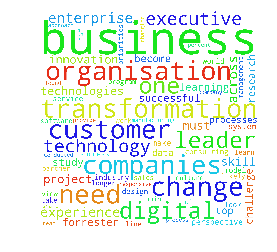

In [42]:
wordcloud = WordCloud(
    #font_path='Xerox Sans Serif Wide Bold Oblique.ttf',
    #stopwords=STOPWORDS.union(stopword),
    background_color='white',
    #mask = logomask,
    max_words=70,
    width=4000,
    height=4000
).generate(temp)

plt.imshow(wordcloud.recolor(random_state=3))
plt.axis('off')
plt.savefig('./HR_head.png', dpi=300)
plt.show()